In [2]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io
import seaborn as sns

%matplotlib inline

# EFTP: analysis of $\|F(\widetilde{x}^N)\|^2$

## $L = 1, \mu = 0$

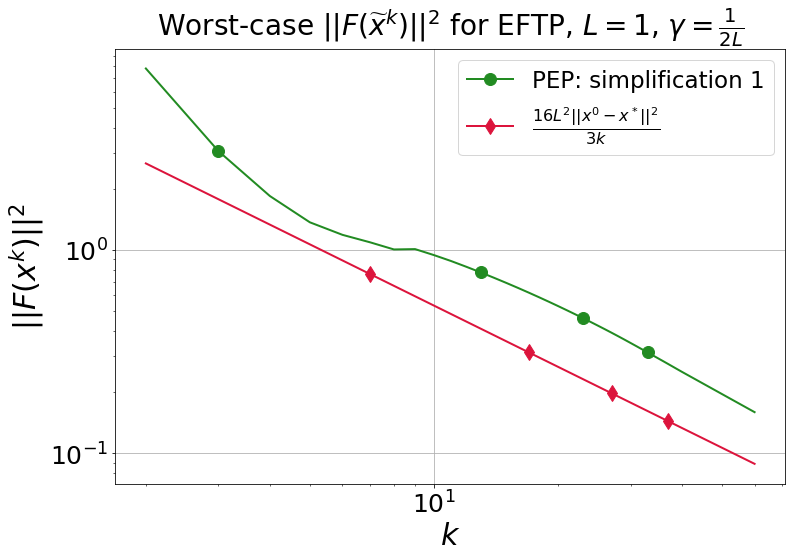

In [59]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 40

worst_case_sq_norm_2_points = np.array([])
guessed_upper_bound = np.array([])

gamma_str = '%.6f' % gamma

for N in range(N_max-1):
    res_2_points = scipy.io.loadmat('dump/EFTP_tilde_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(N+2)))
    
res_2_points = scipy.io.loadmat('dump/EFTP_tilde_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_str+'.mat')
worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(60)))
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(\widetilde{x}^k)||^2$ for EFTP, $L = 1$, $\gamma = \frac{1}{2L}$", fontsize=28)

x_array = np.array(range(N_max-1))+2
x_array = np.append(x_array, 60)

plt.semilogy(x_array, worst_case_sq_norm_2_points, linewidth=2,
             markersize = 12, marker = "o",
             markevery=range(1, N_max-1, 10), color="forestgreen",
             label='PEP: simplification 1')
plt.semilogy(x_array, guessed_upper_bound, linewidth=2, 
             markersize = 12, marker = "d",
             markevery=range(5, N_max-1, 10), color="crimson",
             label=r'$\frac{16L^2||x^0 - x^*||^2}{3k}$')


plt.legend(loc='upper right', fontsize=23)
plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

# plt.savefig("plot/EFTP_norm_L_"+str(L)+'_N_'+str(N_max)+".png", bbox_inches='tight')

# Guessing dual variables

## $L = 1, \mu = 0$

## $\gamma = \frac{1}{4L}$

In [47]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_tilde_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if (j != 0) and ((i%2 != 0) or (j != i-1)) and ((i%2 != 1) or (j != i-2)) and ((i%2 != 0) | (j != i-2) | (i >= 2*N_max + 1-8) | (i <= 8)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((j != 0) or (i%2 != 1)) and (((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0))):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

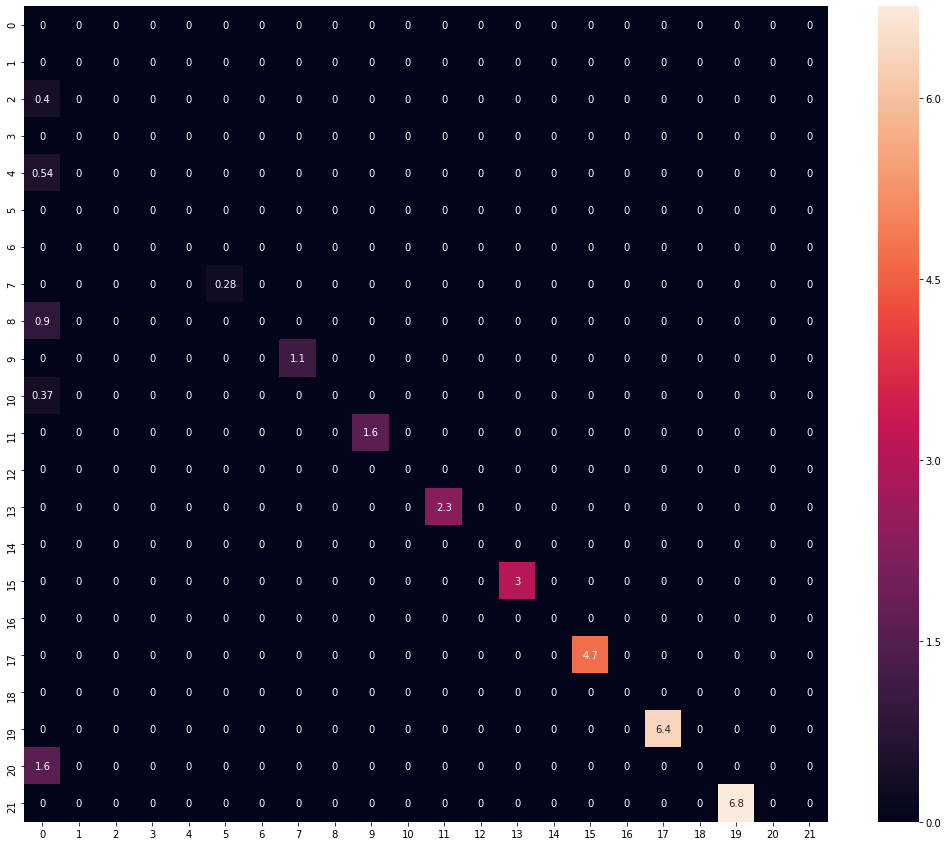

In [48]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

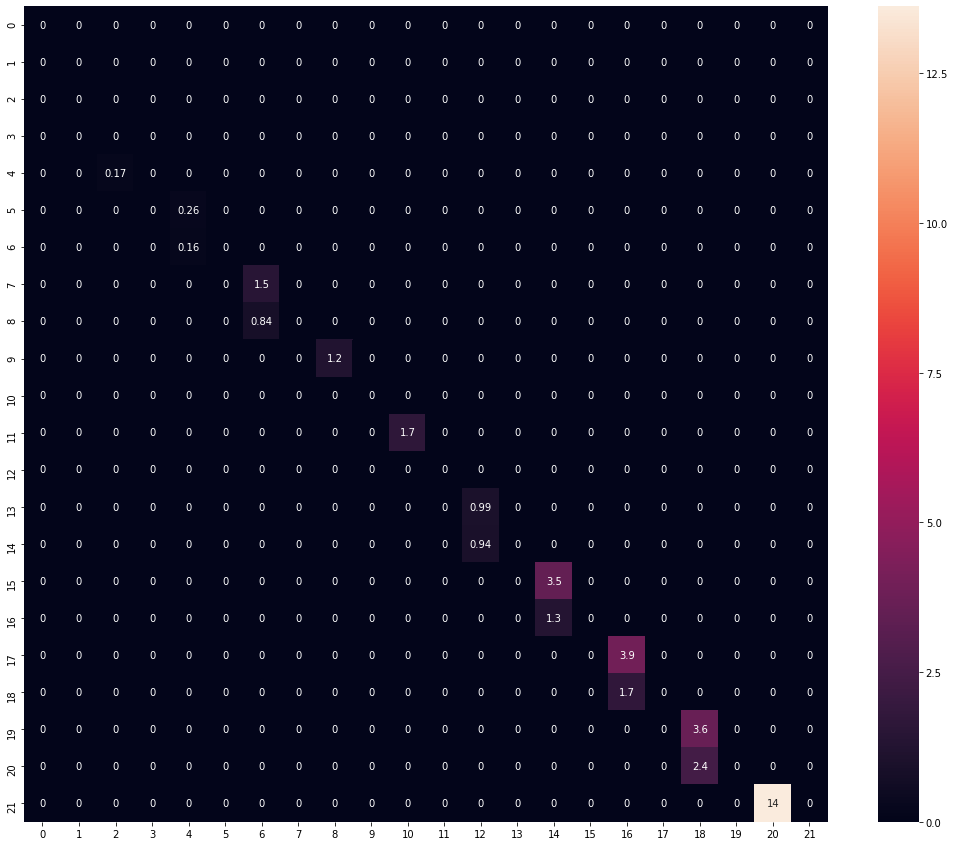

In [49]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [50]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_tilde_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if (j != 0) and ((i%2 != 0) or (j != i-1)) and ((i%2 != 1) or (j != i-2)) and ((i%2 != 0) | (j != i-2) | (i >= 2*N_max + 1-8) | (i <= 8)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((j != 0) or (i%2 != 1)) and (((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0))):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

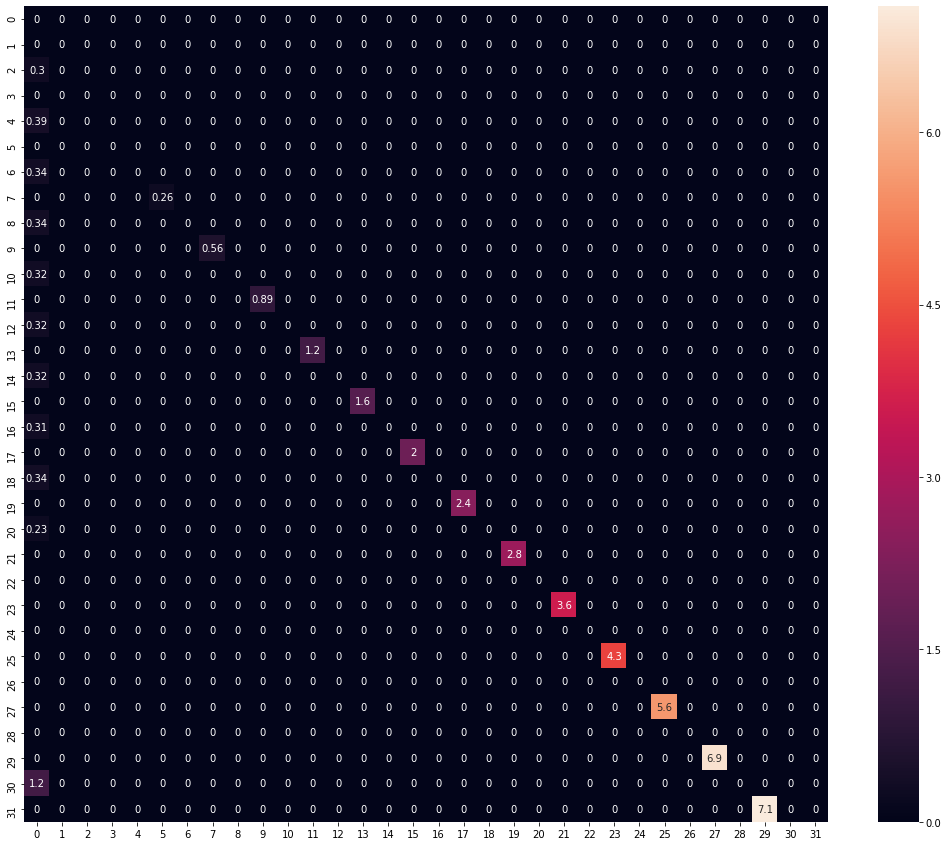

In [51]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

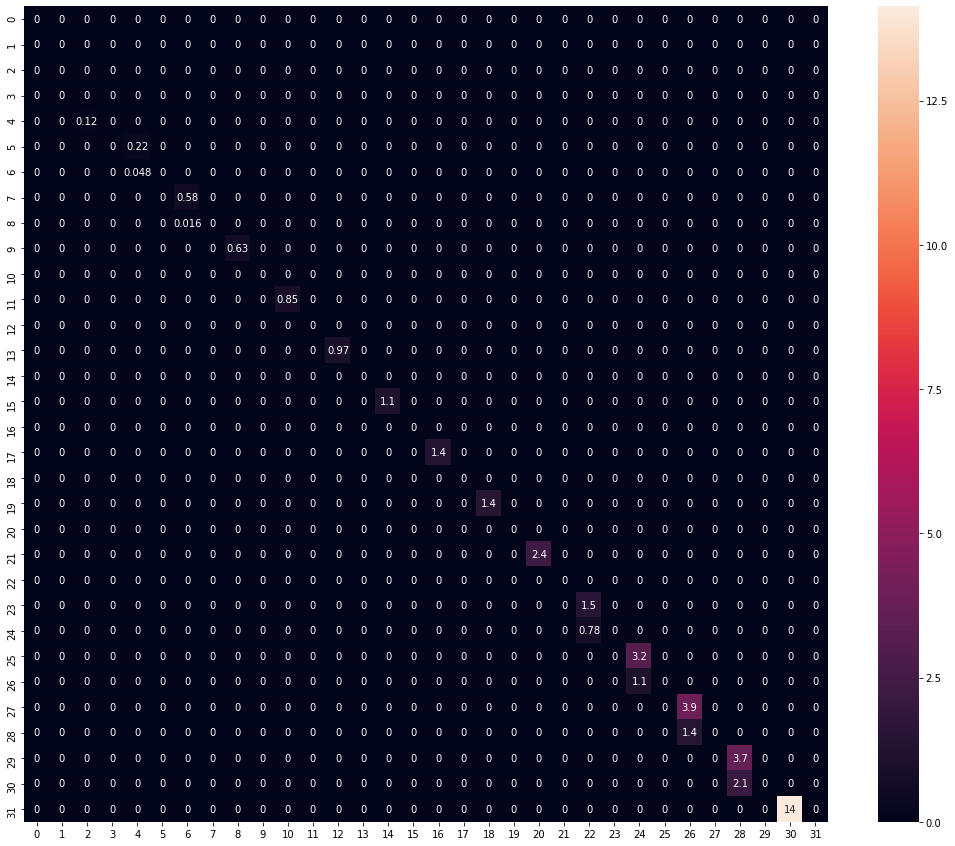

In [52]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [53]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 20
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_tilde_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if (j != 0) and ((i%2 != 0) or (j != i-1)) and ((i%2 != 1) or (j != i-2)) and ((i%2 != 0) | (j != i-2) | (i >= 2*N_max + 1-8) | (i <= 8)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((j != 0) or (i%2 != 1)) and (((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0))):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

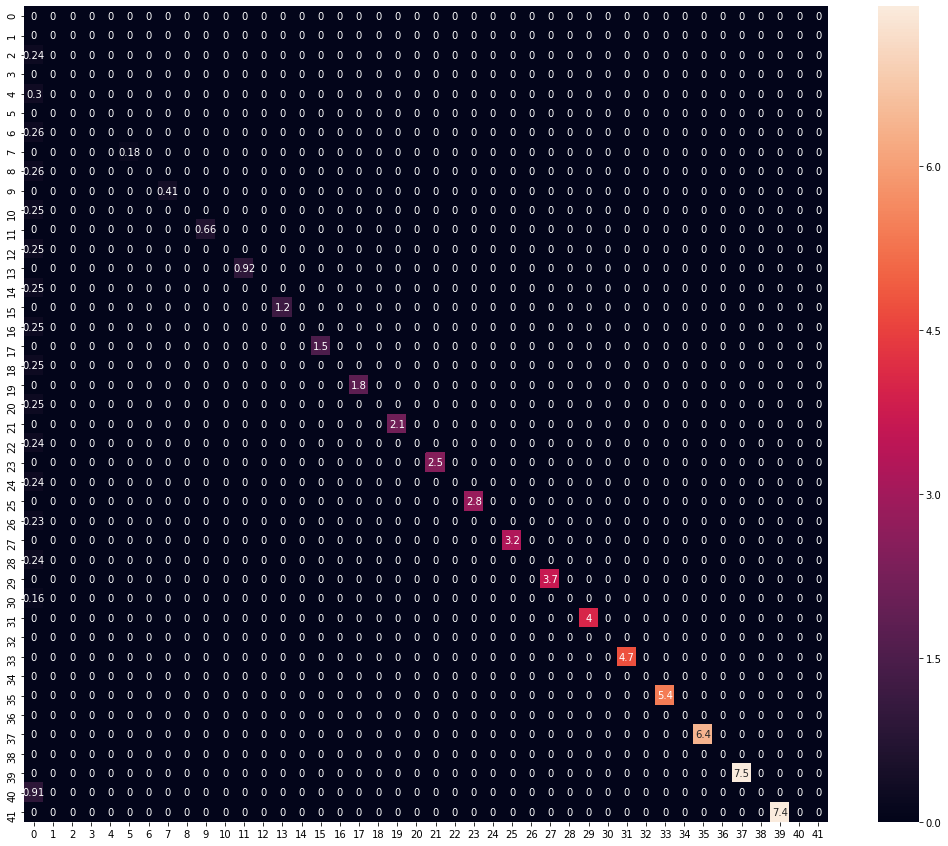

In [54]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

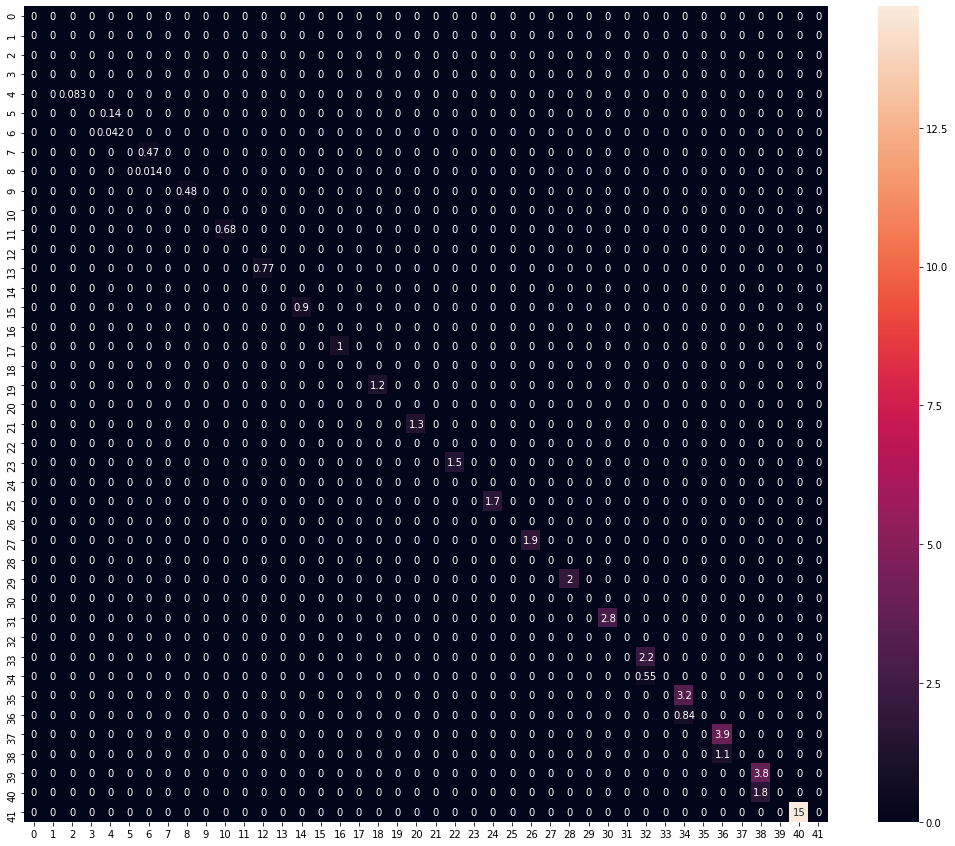

In [55]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)